In [1]:
%pip install numpy
%pip install pandas
%pip install tensorflow
%pip install tqdm
%pip install scikit_learn
%pip install tqdm
%pip install opencv_python
%pip install matplotlib
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing required libraries:::
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import os
import random
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
def loadImages(folder, num_images=2500):
    images = []
    filenames = os.listdir(folder)
    # selectedFilenames = random.sample(filenames, num_images)
    for filename in tqdm(filenames):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (100, 100))
            images.append(img.flatten())
    return images

male_images = loadImages('./data/maleeyes')
female_images = loadImages('./data/femaleeyes')

male_labels = np.zeros(len(male_images))
female_labels = np.ones(len(female_images))

100%|██████████| 5202/5202 [00:02<00:00, 2397.00it/s]


In [4]:
images = np.concatenate((male_images, female_images), axis=0)
labels = np.concatenate((male_labels, female_labels), axis=0)

### Exploratory Data Analysis::::

In [5]:
eyesDatas = pd.DataFrame({'image': images.tolist(), 'label': labels.astype(int)})

In [6]:
eyesDataFrame = eyesDatas.sample(frac=1).reset_index(drop=True)

In [7]:
eyesDataFrame.head()

,image,label
0,"[169, 193, 223, 168, 192, 222, 167, 191, 221, ...",1
1,"[155, 166, 204, 155, 167, 205, 156, 169, 207, ...",0
2,"[115, 147, 200, 118, 150, 203, 123, 155, 209, ...",0
3,"[120, 127, 170, 117, 124, 167, 111, 118, 161, ...",1
4,"[245, 245, 245, 246, 246, 246, 247, 247, 247, ...",1


In [8]:
eyesDataFrame.shape

(11525, 2)

- We can see we have total 11525 rows and 2 coulumns in our dataset which is combination of both male and female eyes.

In [9]:
eyesDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11525 entries, 0 to 11524
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   11525 non-null  object
 1   label   11525 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 135.2+ KB


In [10]:
eyesDataFrame.describe()

,label
count,11525.000000
mean,0.451367
std,0.497651
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


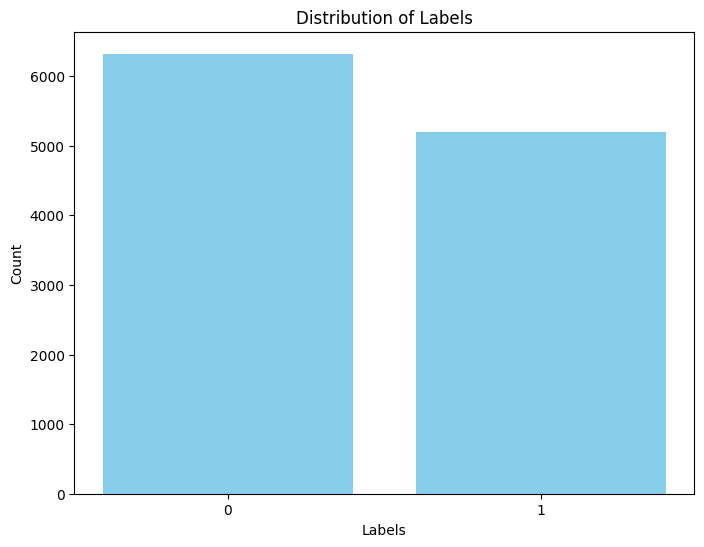

In [11]:
labels = eyesDataFrame['label']
label_counts = labels.value_counts()

# Plotting bar chart
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(label_counts.index)
plt.show()

- The plot shows the count plot of each category male or female, from which we can analyze the baisness of the data towards one category. For this dataset, we can also use imbalance solving methods but from the graph I feel like the 0 category is only 1000 more, the data may fit without balancing.

In [12]:
X = np.array(eyesDataFrame['image'].tolist())
y = np.array(eyesDataFrame['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

- Splitting the dataset to 80% train and 20% test dataset

### Implementation of 3 classification models::::

Model - KNN Classifier::::

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Initialize and train the SVM model
# svm_model = SVC(kernel='poly', C=10, gamma=0.0001, random_state=42)
# svm_model.fit(X_train_scaled, y_train)

# # Evaluate the model
# svm_accuracy = svm_model.score(X_test_scaled, y_test)
# print("SVM Accuracy:", svm_accuracy)


- for SVG model, I tried some params randomly but with every params; it's taking lots of time to fit the model. Thats why I went with KNN classifier. I could have tried gridsearch for tuning but because of previous experiences, I optioned it.

In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8399132321041215
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1254
           1       0.88      0.76      0.81      1051

    accuracy                           0.84      2305
   macro avg       0.85      0.83      0.84      2305
weighted avg       0.84      0.84      0.84      2305



- used Knnclassifier with random n_neighbors = 5 , we got accuracy of 82% within 12s of run

Model: Multilayer Perceptron (MLP) Model

In [16]:
# Define the MLP model architecture
mlp_model = Sequential([
    Flatten(input_shape=X_train[0].shape),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\aacic\anaconda3\envs\gpu_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,840,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,848,449 (14.68 MB)

 Trainable params: 3,848,449 (14.68 MB)

 Non-trainable params: 0 (0.00 B)

- For MLP model, We have made 1 input layer, 2 hidden layer and 1 output layer.

In [22]:
# Compile the model
mlp_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the model
mlpHistory = mlp_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test)
print("MLP Accuracy:", mlp_accuracy)


Epoch 1/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5483 - loss: 0.6928 - val_accuracy: 0.5445 - val_loss: 0.6863
Epoch 2/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5432 - loss: 0.6892 - val_accuracy: 0.5445 - val_loss: 0.6860
Epoch 3/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5495 - loss: 0.6881 - val_accuracy: 0.5445 - val_loss: 0.6860
Epoch 4/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5529 - loss: 0.6875 - val_accuracy: 0.5445 - val_loss: 0.6860
Epoch 5/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5519 - loss: 0.6878 - val_accuracy: 0.5445 - val_loss: 0.6859
Epoch 6/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5581 - loss: 0.6865 - val_accuracy: 0.5445 - val_loss: 0.6859
Epoch 7/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5486 - loss: 0.6885 - val_accuracy: 0.5445 - val_loss: 0.6860
Epoch 8/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5461 - loss: 0.6888 - val_accu

- Running for 25 epochs, MLP is only giving 54% of accuracy which is lower than that of KNN for this dataset.

In [19]:
y_pred_MLP = mlp_model.predict(X_test)
y_pred_MLP = np.round(y_pred_MLP)

print(classification_report(y_test, y_pred_MLP))

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1254
           1       1.00      0.00      0.00      1051

    accuracy                           0.54      2305
   macro avg       0.77      0.50      0.35      2305
weighted avg       0.75      0.54      0.38      2305



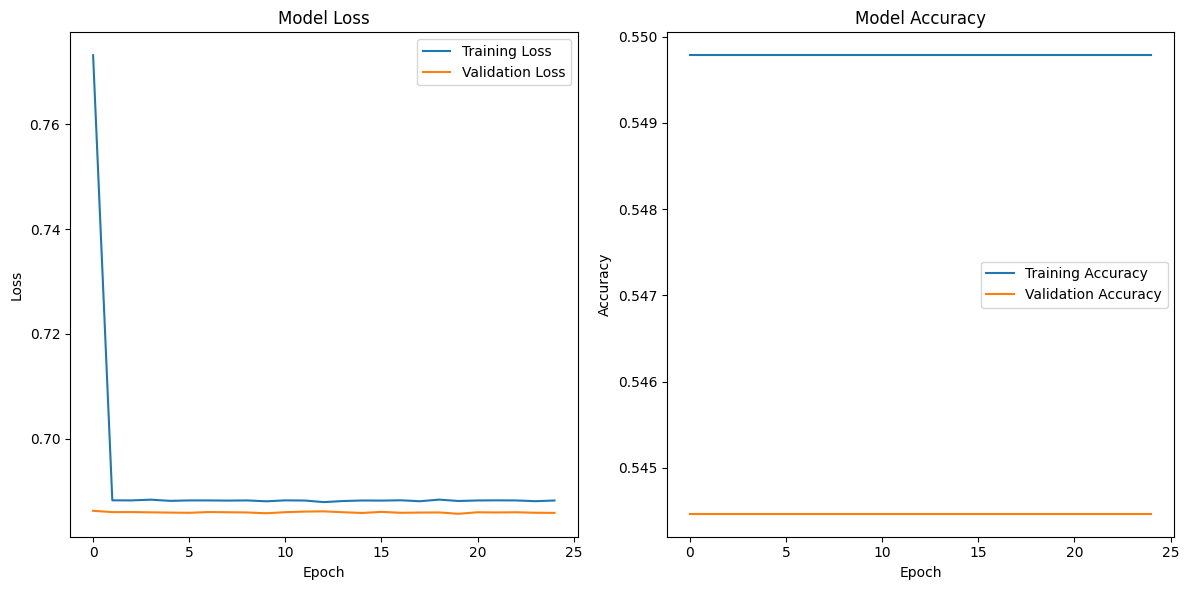

In [23]:
# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mlpHistory.history['loss'], label='Training Loss')
plt.plot(mlpHistory.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(mlpHistory.history['accuracy'], label='Training Accuracy')
plt.plot(mlpHistory.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

- From the graph, we can say that at the beginning of trainning the loss was high for the trainning dataset nearly 78% which decreased to nearly 71% after 1-2 epochs and remained constant afterward whereas the loss was nearly as same as trainning for validation dataset after 1-2 epochs . whilst the accuracy remained consistent for both training and validation dataset throughout the period. 

Model: Convolutional Neural Network (CNN) Model

In [26]:
X_train_cnn = X_train_scaled.reshape(-1, 100, 100, 3)
X_test_cnn = X_test_scaled.reshape(-1, 100, 100, 3)

# Define the CNN model architecture
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

c:\Users\aacic\anaconda3\envs\gpu_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [27]:
print(cnn_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │     2,166,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,186,305 (8.34 MB)

 Trainable params: 2,186,305 (8.34 MB)

 Non-trainable params: 0 (0.00 B)

None


- For CNN model, We have made 2 convolutional layer, 2 pooling layer, a flatting layer, a dense, a dropout layer and a output layer. First one is convolutional layer which applies filter to our input data which will be passed to pooling layer where the input from first convolutional layer and it will reduces the spatial dimensions of each feature map by taking the maximum value in each non-overlapping window. Then we have one convolutional layer which takes the reduced dimension and again applies filter. Again the data will go through another pooling layer thereafter flattened to 1d input which will be passed through the dense neurons and sent to dropout layer which helps prevent overfitting by randomly dropping neurons during training and finally gives the classified output.

In [31]:
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

cnnHistory = cnn_model.fit(X_train_cnn, y_train, epochs=25, batch_size=32, validation_data=(X_test_cnn, y_test))

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print("CNN Accuracy:", cnn_accuracy)


Epoch 1/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9806 - loss: 0.0486 - val_accuracy: 0.9332 - val_loss: 0.4214
Epoch 2/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9838 - loss: 0.0427 - val_accuracy: 0.9332 - val_loss: 0.3877
Epoch 3/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9751 - loss: 0.0656 - val_accuracy: 0.9197 - val_loss: 0.4965
Epoch 4/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9825 - loss: 0.0450 - val_accuracy: 0.9262 - val_loss: 0.4730
Epoch 5/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9819 - loss: 0.0379 - val_accuracy: 0.9306 - val_loss: 0.4919
Epoch 6/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9856 - loss: 0.0385 - val_accuracy: 0.9388 - val_loss: 0.4613
Epoch 7/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9853 - loss: 0.0327 - val_accuracy: 0.9267 - val_loss: 0.3994
Epoch 8/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9850 - loss: 0.0382 - 

- Running for just 10 epochs, we got an accuracy of 92% with CNN model classifier which is far better than the MLP in 25 epochs. 

In [ ]:
y_pred_CNN = cnn_model.predict(X_test_cnn)
y_pred_CNN = np.round(y_pred_CNN)

print(classification_report(y_test, y_pred_CNN))

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1269
           1       0.93      0.89      0.91      1036

    accuracy                           0.92      2305
   macro avg       0.92      0.92      0.92      2305
weighted avg       0.92      0.92      0.92      2305



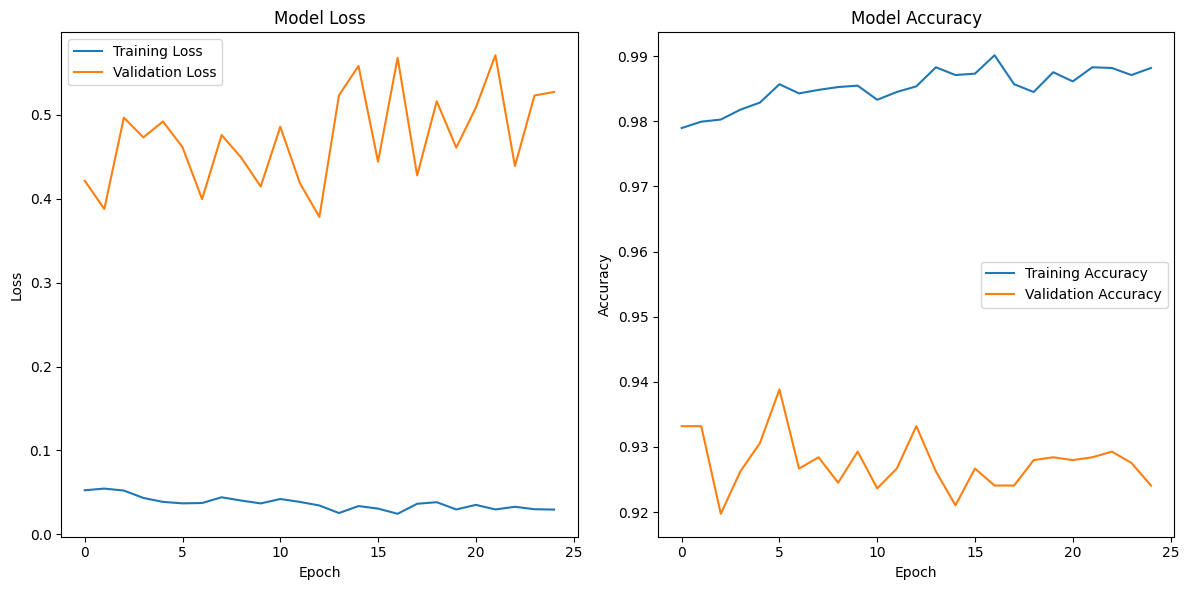

In [32]:
# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnnHistory.history['loss'], label='Training Loss')
plt.plot(cnnHistory.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(cnnHistory.history['accuracy'], label='Training Accuracy')
plt.plot(cnnHistory.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

- From the graph, we can say that at the beginning of trainning the loss was minimum for the trainning dataset less than 1% which even tried to reach more minimal state coming to last epoch. The loss for validation dataset was nearly 0.5 on an average . whilst the accuracy was very high for trainning dataset more that 97% for all epochs and more than 92% for validation dataset.

### Provide intuition behind the architecture of the neural network models:::

- Different designs of MLPs and CNNs are suited to different kinds of data and jobs. MLPs are flexible and may be used for a wide range of applications, whereas CNNs are made especially for jobs requiring spatially structured input, such object detection and picture classification. Both systems use non-linear transformations and hierarchical feature learning to derive meaningful representations from the input data.
- Multiple layers of neurons, which includes an input, hidden, and output layer, make up machine learning models, or MLPs. Due to their connections, these layers form a dense network. MLPs can learn intricate maps between inputs and outputs by utilizing both linear transformations and non-linear activation functions. With sufficient hidden units and enough training, they can figure out any function, making them universal function approximators. Features of increasing complexity are extracted as information moves through the layers, and global connection makes it possible to capture complex connections across the input space.
- CNNs simulate reactions from the visual brain by using local receptive fields. They minimize the number of parameters by effectively learning translation-invariant features through the use of shared weights and feature maps. Convolutional, pooling, and fully connected layers are among the layers that make up CNNs, which are used to extract low-level features like edges and textures. With lower layers catching local details and higher layers capturing global information, they build a spatial hierarchy of characteristics. Because CNNs can learn features that are invariant to translations, they are well-suited for tasks involving spatially structured data such images. This means that objects can be recognized in photos regardless of where they are located.


### Compare the performance of the 3 models, communicate the findings::::

According to the accuracy of the classification models; for this data set the performance is CNN > KNN > MLP with accuracies of 92%, 84% ,54%. 
Further for other metrices, the classification report for each model looks like this:

KNN::::
|                   |precision |recall   |f1-score |support    |
|      :---         |  :----:  |  :----: | :----:  | ---:      |
|           0       |0.82      |0.91     |0.86     |1254       |
|           1       |0.88      |0.76     |0.81     |1051       |
|    accuracy       |          |         |0.84     |2305       |
|   macro avg       |0.85      |0.83     |0.84     |2305       |
|weighted avg       |0.84      |0.84     |0.84     |2305       |

MLP::::
|                   |precision |recall   |f1-score |support    |
|      :---         |  :----:  |  :----: | :----:  | ---:      |
|           0       |0.54      |1.00     |0.70     |1254       |
|           1       |1.00      |0.00     |0.00     |1051       |
|    accuracy       |          |         |0.54     |2305       |
|   macro avg       |0.77      |0.50     |0.35     |2305       |
|weighted avg       |0.75      |0.54     |0.38     |2305       |

CNN::::
|                   |precision |recall   |f1-score |support    |
|      :---         |  :----:  |  :----: | :----:  | ---:      |
|           0       |0.92      |0.95     |0.93     |1269       |
|           1       |0.93      |0.89     |0.91     |1036       |
|    accuracy       |          |         |0.92     |2305       |
|   macro avg       |0.92      |0.92     |0.92     |2305       |
|weighted avg       |0.92      |0.92     |0.92     |2305       |

### Conclusion:::

- In this project, we applied 3 models to eye dataset for gender prediction. CNNs are highly specialized for processing grid-like data such as images and excel at capturing spatial hierarchies, while MLPs are more general-purpose and can be applied to a wide range of tasks. The choice between CNNs and MLPs depends on the nature of the data and the specific task at hand. So, as we have images so CNN is working better with the dataset. KNN classifiers are offer simplicity and intuitiveness in classification tasks, especially for datasets with clear separable classes and fewer dimensions. For this dataset, we have images which is basically array of features which multiple dimension. Overall, CNN also performed better as per their use cases defined.